In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import matplotlib.gridspec as gridspec

In [57]:
members = pd.read_csv('C:\\Users\dgurram\Desktop\Capstone\members_v3.csv')

In [58]:
transactions = pd.read_csv('C:\\Users\\dgurram\\Desktop\\Capstone\\transactions_v2.csv')

In [59]:
user_logs = pd.read_csv('C:\\Users\\dgurram\\Desktop\\Capstone\\user_logs_v2.csv')

In [60]:
train = pd.read_csv('C:\\Users\\dgurram\\Desktop\\Capstone\\train_v2.csv')

In [338]:
x1 = pd.merge(train,members, on='msno', how='left')
#x1.isnull().sum()

In [339]:
x2 = pd.merge(x1, transactions, on='msno', how='left')
#x2.isnull().sum()

In [340]:
final = pd.merge(x2, user_logs, on='msno', how='left')
#final.isnull().sum()

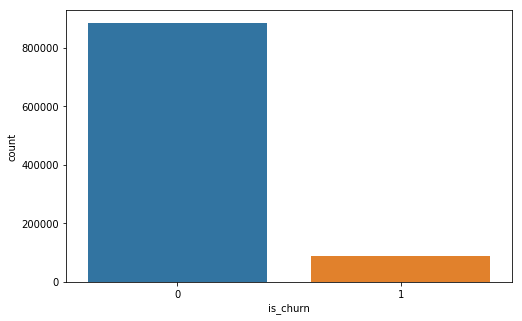

Churn Percentage: 8.994191315811156


In [341]:
plt.figure(figsize=(8,5))
sns.countplot(x="is_churn", data=train)
plt.show()
print('Churn Percentage: ' + str(87330/970960 * 100))

Only 9% people have churned which looks so successfull, making it a highly imbalanced classification problem. 

# Data Exploration in x1(merged data set of train and members)

In [66]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970960 entries, 0 to 970959
Data columns (total 7 columns):
msno                      970960 non-null object
is_churn                  970960 non-null int64
city                      860967 non-null float64
bd                        860967 non-null float64
gender                    388905 non-null object
registered_via            860967 non-null float64
registration_init_time    860967 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 59.3+ MB


Because not every member is present in members data set, we are observing some null values here.

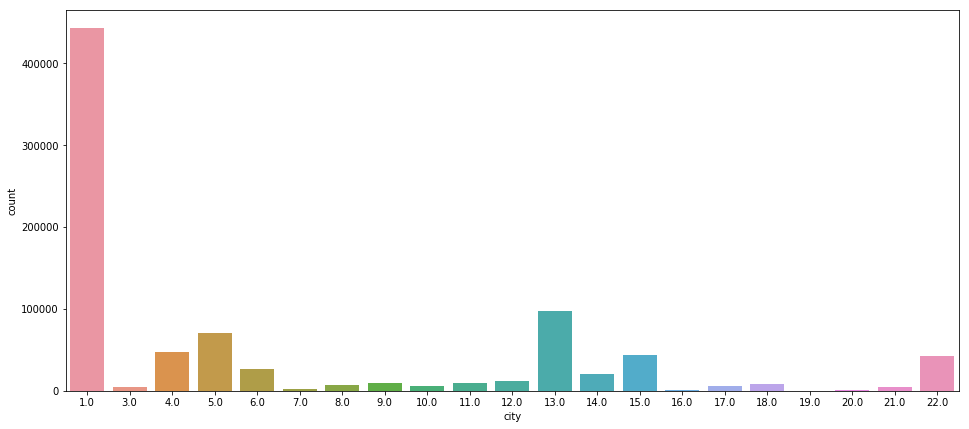

In [67]:
plt.figure(figsize=(16,7))
sns.countplot(x="city", data=x1)
plt.show()

There are total of 21 cities, there is no city '2'. We observe majority from city 1. Everything else looks similarly unpopular.

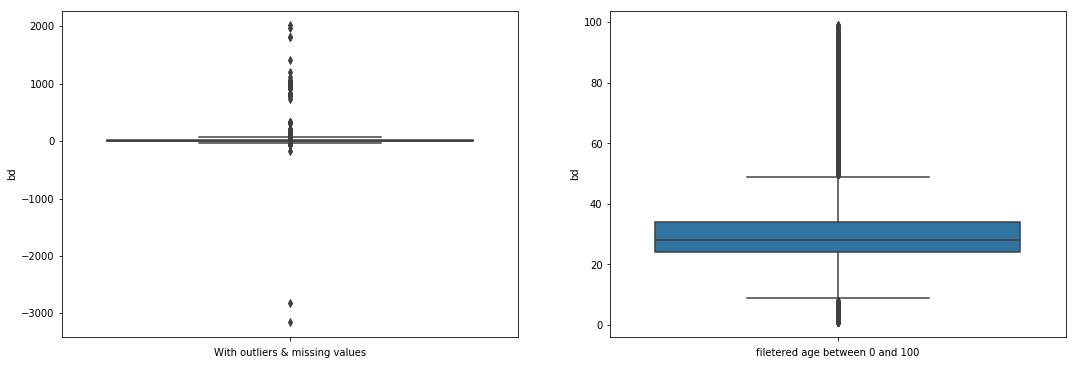

In [238]:
plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
sns.boxplot(y = x1.bd, data = x1)
plt.xlabel('With outliers & missing values')
plt.subplot(1,2,2)
filtered_bd =x1.bd[(x1.bd > 0 )& (x1.bd < 100)] 
sns.boxplot(y = filtered_bd, data = x1)
plt.xlabel('filetered age between 0 and 100')
plt.show()

Here in the bd (Age) column we observed it has lot of values set to 0 and there are some outliers.

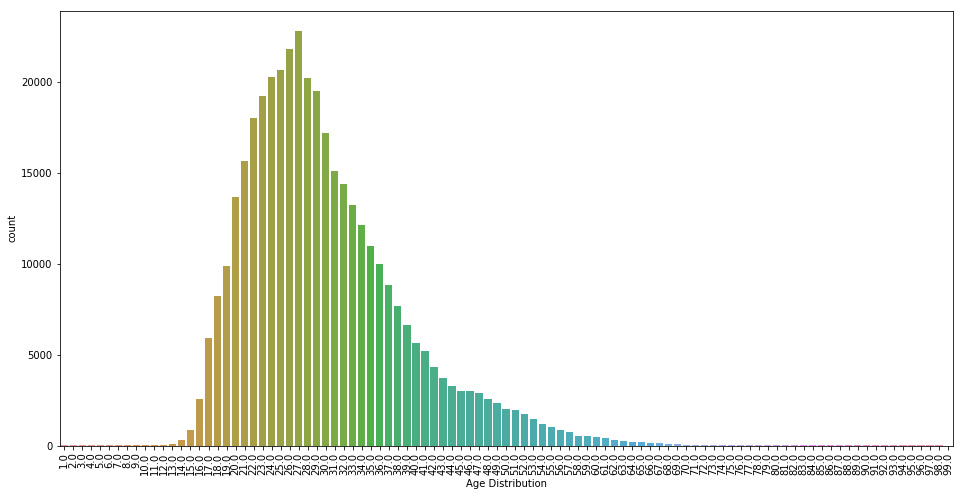

In [228]:
plt.figure(figsize = (16,8))
filtered_bd =x1.bd[(x1.bd > 0 )& (x1.bd < 100)] 
sns.countplot(filtered_bd)
plt.xticks(rotation = 90)
plt.xlabel('Age Distribution')
plt.show()

Here we filtered the bd (Age) column between 0 and 100 and from the above distribution we can clearly see that most of the customers are aged betweem mid 20's to mid 40's.

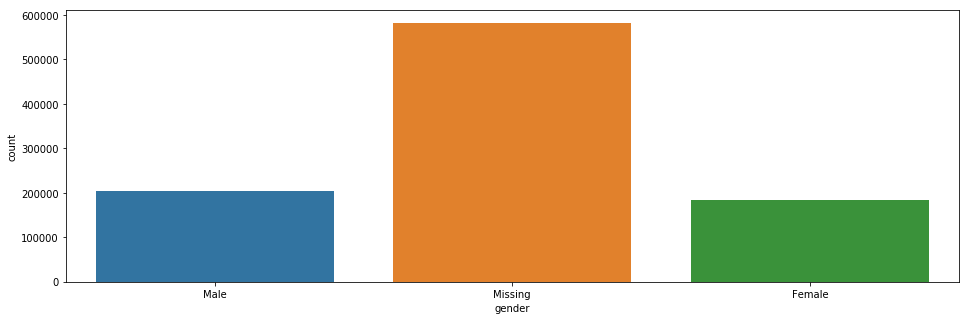

In [68]:
x1['gender'] = x1['gender'].fillna('M')
plt.figure(figsize=(16,5))
sns.countplot(x="gender", data=x1)
plt.xticks(np.arange(3), ("Male", "Missing","Female"))
plt.show()

Here we observe that the male and female population are almost equally distributed, but around 60% of the data is missing. We have to see how to deal with them in future analysis.

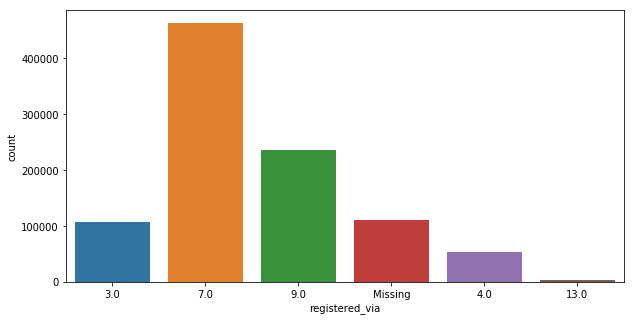

In [69]:
plt.figure(figsize=(10,5))
x1['registered_via'] = x1['registered_via'].fillna('Missing')
sns.countplot(x="registered_via", data=x1)
plt.show()

There are 5 classes('3', '7', '9', '4', '13') listed as registration method. There are also some additional classes in the members dataset. As we merged the train and members they are missing here.

In [70]:
x1['registration_init_time'] = x1['registration_init_time'].astype(str).apply(lambda x: pd.to_datetime(x, format='%Y%m%d'))

Transformed the type of date column from float to datetime

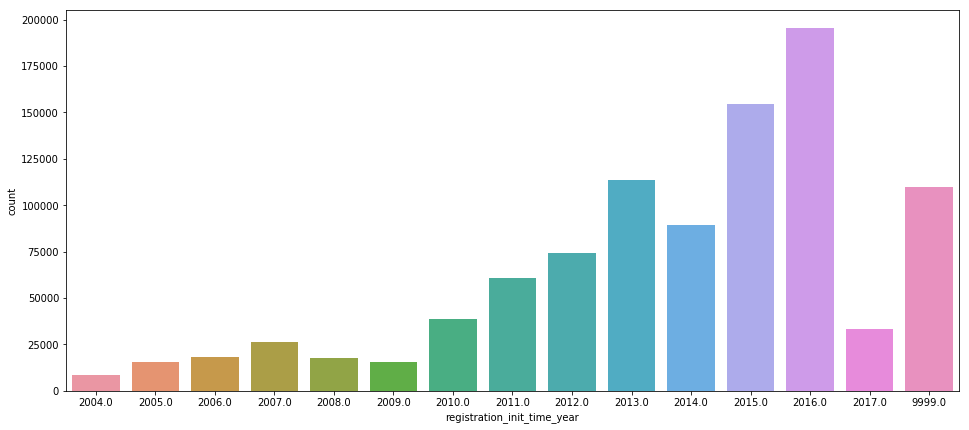

In [71]:
x1['registration_init_time_year'] = pd.DatetimeIndex(x1['registration_init_time']).year
x1['registration_init_time_year'] = x1['registration_init_time_year'].fillna(9999)
plt.figure(figsize=(16,7))
sns.countplot(x="registration_init_time_year", data=x1)
plt.show()

Here we observe that registration has increased yearly though there is a dip in 2014.

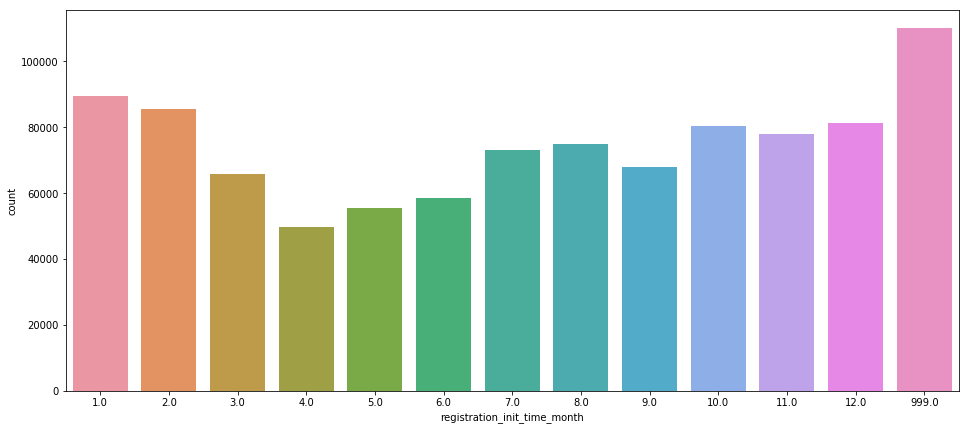

In [72]:
x1['registration_init_time_month'] = pd.DatetimeIndex(x1['registration_init_time']).month
x1['registration_init_time_month'] = x1['registration_init_time_month'].fillna(999)
plt.figure(figsize=(16,7))
sns.countplot(x="registration_init_time_month", data=x1)
plt.show()

In this we observed that the registrations are high during the year end and year starting months.

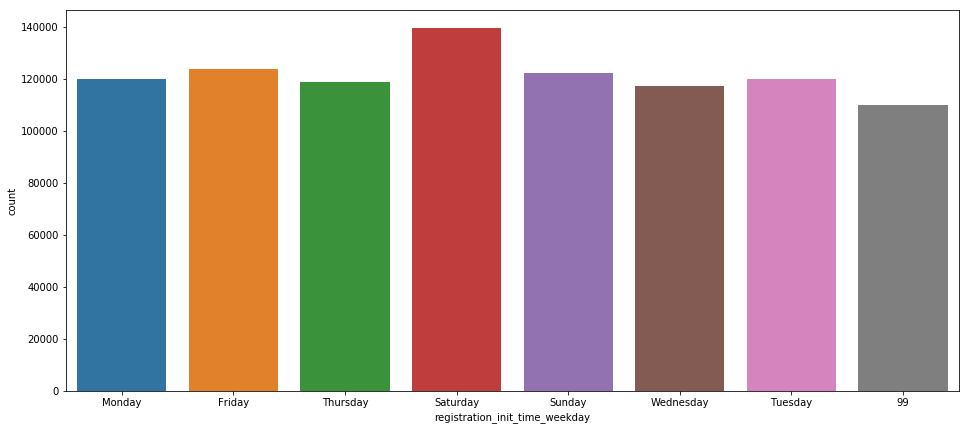

In [73]:
x1['registration_init_time_weekday'] = pd.DatetimeIndex(x1['registration_init_time']).weekday_name
x1['registration_init_time_weekday'] = x1['registration_init_time_weekday'].fillna(99)
plt.figure(figsize=(16,7))
sns.countplot(x="registration_init_time_weekday", data=x1)
plt.show()

We see that Saturday and Sunday have higher registrations than rest of the week.

# Data Exploration in x2 (merged data set of x1 and transactions)

In [79]:
transactions.isnull().sum()

msno                      0
payment_method_id         0
payment_plan_days         0
plan_list_price           0
actual_amount_paid        0
is_auto_renew             0
transaction_date          0
membership_expire_date    0
is_cancel                 0
dtype: int64

In [74]:
x2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169418 entries, 0 to 1169417
Data columns (total 15 columns):
msno                      1169418 non-null object
is_churn                  1169418 non-null int64
city                      1052582 non-null float64
bd                        1052582 non-null float64
gender                    501005 non-null object
registered_via            1052582 non-null float64
registration_init_time    1052582 non-null float64
payment_method_id         1132036 non-null float64
payment_plan_days         1132036 non-null float64
plan_list_price           1132036 non-null float64
actual_amount_paid        1132036 non-null float64
is_auto_renew             1132036 non-null float64
transaction_date          1132036 non-null float64
membership_expire_date    1132036 non-null float64
is_cancel                 1132036 non-null float64
dtypes: float64(12), int64(1), object(2)
memory usage: 142.8+ MB


In [345]:
print('null values :' + str(1169418-1132036))

null values :37382


Though there are no null values in transactions data set, we observed 37382 null values in x2 data set (which is merged dataset of x1 and transactions data sets). So, now we have to find out what is it that causing the null values in x2. 

In [298]:
msno_no_transactions = x2[x2['plan_list_price'].isnull()==True]['msno']
transactions[transactions['msno'].isin(msno_no_transactions)]

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel


The above query proves that the NULL values in x2 occurred as there are no entries for the msno id's, that are present in train data set.

In [245]:
x2_multiple= x2['msno'].value_counts().reset_index()
sum(x2_multiple['msno'])
#x2_multiple[x2_multiple['msno'] > 1].sum()

1169418

Check if there are multiple transactions for the same 'msno' id in transactions data set. Here for 115989 'msno' id's there are more than one transactions are observed in the transaction data set.

In [239]:
#extracting one msno in many msno that has 10 transactions
find_msno = x2['msno'].value_counts()
find_msno[find_msno == 10].head(1)

xASXoa7dMSezJR6ut/rdaZZuH1xKS++Nrl/WSzzuRD8=    10
Name: msno, dtype: int64

In [83]:
x2[x2.msno == 'hfJVQ7smRwBYo0212liXSNn3VTa4E0zeN/J6sCCl9x0='].sort_values('transaction_date')

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
651227,hfJVQ7smRwBYo0212liXSNn3VTa4E0zeN/J6sCCl9x0=,0,1.0,0.0,NaN,7.0,20130215.0,41.0,30.0,149.0,149.0,1.0,20150814.0,20170413.0,0.0
651231,hfJVQ7smRwBYo0212liXSNn3VTa4E0zeN/J6sCCl9x0=,0,1.0,0.0,NaN,7.0,20130215.0,41.0,30.0,149.0,149.0,1.0,20150908.0,20170513.0,0.0
651222,hfJVQ7smRwBYo0212liXSNn3VTa4E0zeN/J6sCCl9x0=,0,1.0,0.0,NaN,7.0,20130215.0,41.0,30.0,149.0,149.0,1.0,20150914.0,20170612.0,0.0
651226,hfJVQ7smRwBYo0212liXSNn3VTa4E0zeN/J6sCCl9x0=,0,1.0,0.0,NaN,7.0,20130215.0,41.0,30.0,149.0,149.0,1.0,20151008.0,20170713.0,0.0
651228,hfJVQ7smRwBYo0212liXSNn3VTa4E0zeN/J6sCCl9x0=,0,1.0,0.0,NaN,7.0,20130215.0,41.0,30.0,149.0,149.0,1.0,20151014.0,20170813.0,0.0
651229,hfJVQ7smRwBYo0212liXSNn3VTa4E0zeN/J6sCCl9x0=,0,1.0,0.0,NaN,7.0,20130215.0,41.0,30.0,149.0,149.0,1.0,20151108.0,20170912.0,0.0
651225,hfJVQ7smRwBYo0212liXSNn3VTa4E0zeN/J6sCCl9x0=,0,1.0,0.0,NaN,7.0,20130215.0,41.0,30.0,149.0,149.0,1.0,20151114.0,20171012.0,0.0
651230,hfJVQ7smRwBYo0212liXSNn3VTa4E0zeN/J6sCCl9x0=,0,1.0,0.0,NaN,7.0,20130215.0,41.0,30.0,149.0,149.0,1.0,20151208.0,20171112.0,0.0
651224,hfJVQ7smRwBYo0212liXSNn3VTa4E0zeN/J6sCCl9x0=,0,1.0,0.0,NaN,7.0,20130215.0,41.0,30.0,149.0,149.0,1.0,20151214.0,20171213.0,0.0
651223,hfJVQ7smRwBYo0212liXSNn3VTa4E0zeN/J6sCCl9x0=,0,1.0,0.0,NaN,7.0,20130215.0,41.0,30.0,99.0,99.0,1.0,20170331.0,20170430.0,0.0


Here the confusion  is why are there 2 transaction_date entries every month while the membership_expire_date is different for those 2 entries. It's happening the same way for all the msno id's which have more more than one transactions.

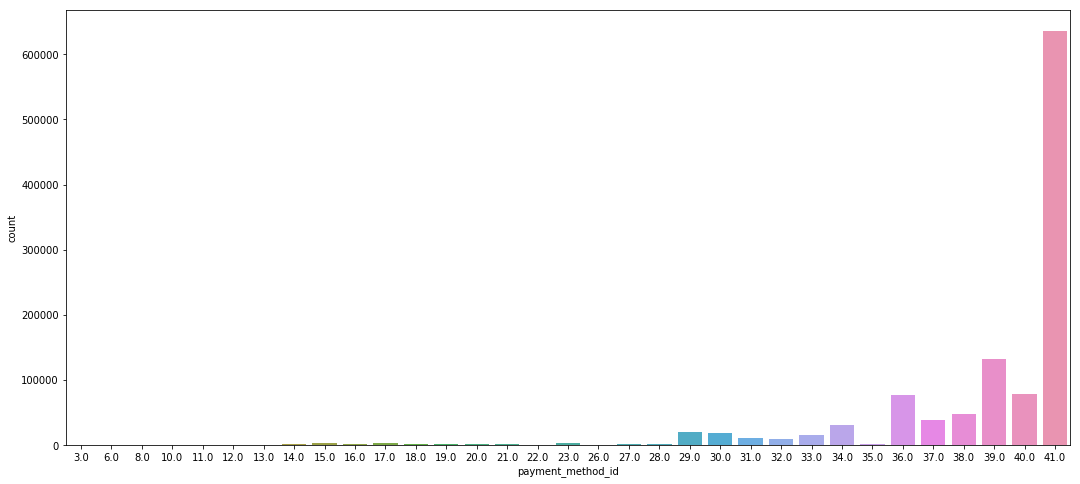

In [76]:
plt.figure(figsize=(18,8))
#x2['payment_method_id'] = x2['payment_method_id'].fillna('Missing')
sns.countplot(x="payment_method_id", data=x2)
plt.show()

The payment_method '41' is by far the most popular one.

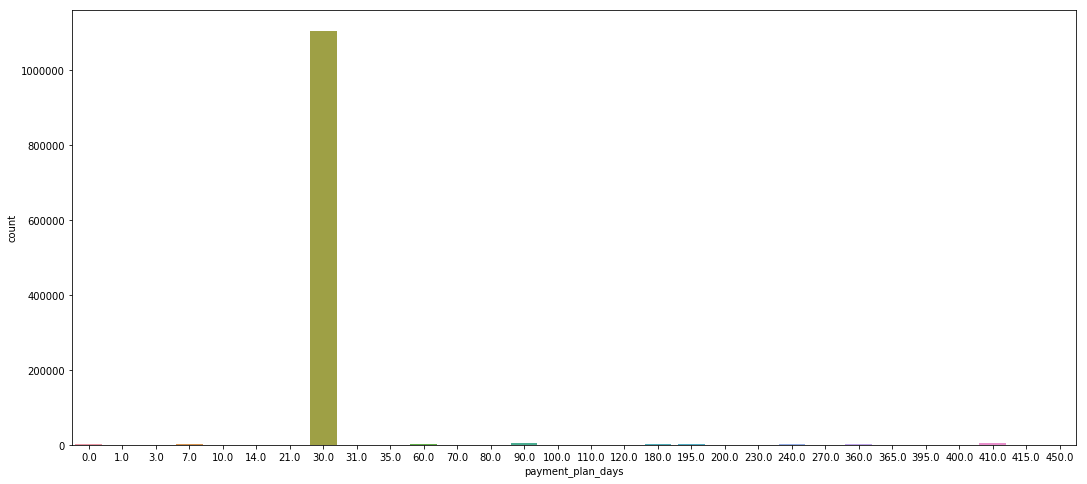

payment_plan_days Count: [(30, 1217998), (410, 82097), (195, 28568), (180, 23900), (90, 19130), (7, 12168), (395, 9753), (360, 4658), (100, 4098), (365, 3838), (120, 3612), (240, 3440), (415, 3298), (60, 3134), (200, 3108), (0, 2218), (400, 1817), (450, 1762), (270, 997), (1, 676), (10, 416), (14, 82), (70, 49), (80, 43), (45, 41), (230, 35), (35, 29), (110, 20), (21, 11), (3, 9), (31, 4)]


In [77]:
plt.figure(figsize=(18,8))
sns.countplot(x="payment_plan_days", data=x2)
plt.show()
payment_plan_days_count = Counter(transactions['payment_plan_days']).most_common()
print("payment_plan_days Count: " +str(payment_plan_days_count))

There are 37 payment_plan_days, out of which 30 day plan is very frequent. This is quite understandable as most people will take monthly subscription.

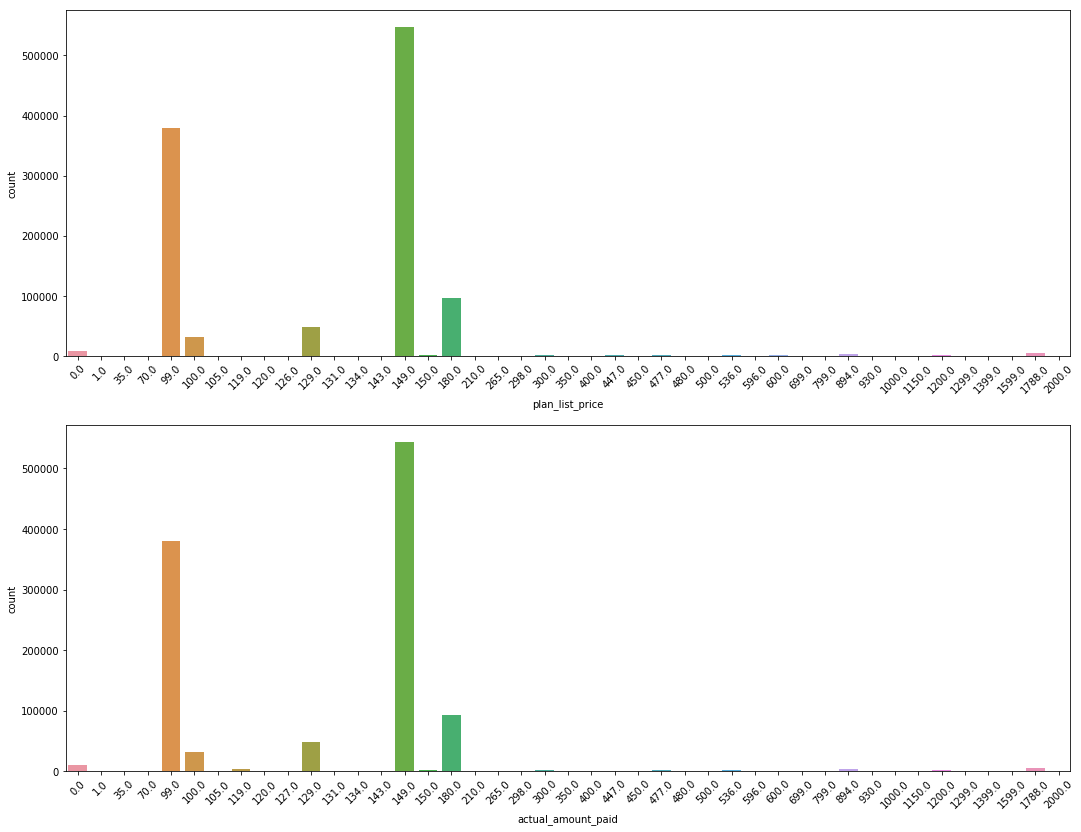

In [189]:
plt.figure(figsize=(18,14))
plt.subplot(2,1,1)
sns.countplot(x="plan_list_price", data=x2)
plt.xticks(rotation = 45)
plt.subplot(2,1,2)
sns.countplot(x="actual_amount_paid", data=x2)
plt.xticks(rotation = 45)
plt.show()

The overall distributions of planned vs actual payment are very similar; even though differences are slightly visible e.g. for 119 NTD. Since both features have the same discrete payment values we can directly compare their frequency.

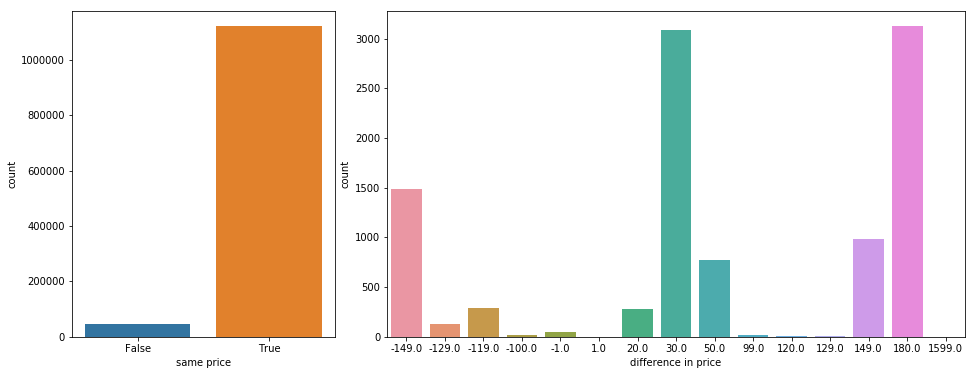

In [213]:
same_price = x2['plan_list_price'] == x2['actual_amount_paid']
diff_price = x2['plan_list_price'] - x2['actual_amount_paid'] 
diff_price = diff_price[diff_price !=0]

plt.figure(figsize=(16,6))
gridspec.GridSpec

plt.subplot2grid((3,3),(0,0), rowspan = 3)
sns.countplot(same_price)
plt.xlabel('same price')

plt.subplot2grid((3,3),(0,1), rowspan = 3, colspan = 2)
sns.countplot(diff_price)
plt.xlabel('difference in price')

plt.show()

Interestingly here, in some cases the users ended up paying more.

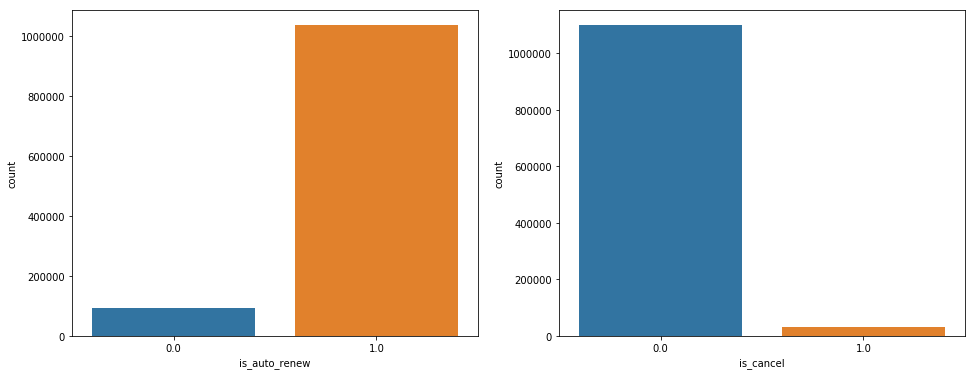

In [288]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(x="is_auto_renew", data=x2)
plt.subplot(1,2,2)
sns.countplot(x="is_cancel", data=x2)
plt.show()
#x2.is_auto_renew[x2.is_auto_renew == 1].count()

The vast majority of users has automatic renewal of their subscriptions enabled and only very few users actively canceled their subscriptions during the plan period.

In [276]:
cancel_date = x2[x2['is_cancel']==1]['transaction_date'].astype(str).apply(lambda x: pd.to_datetime(x, format='%Y%m%d'))

# Cancellation trend

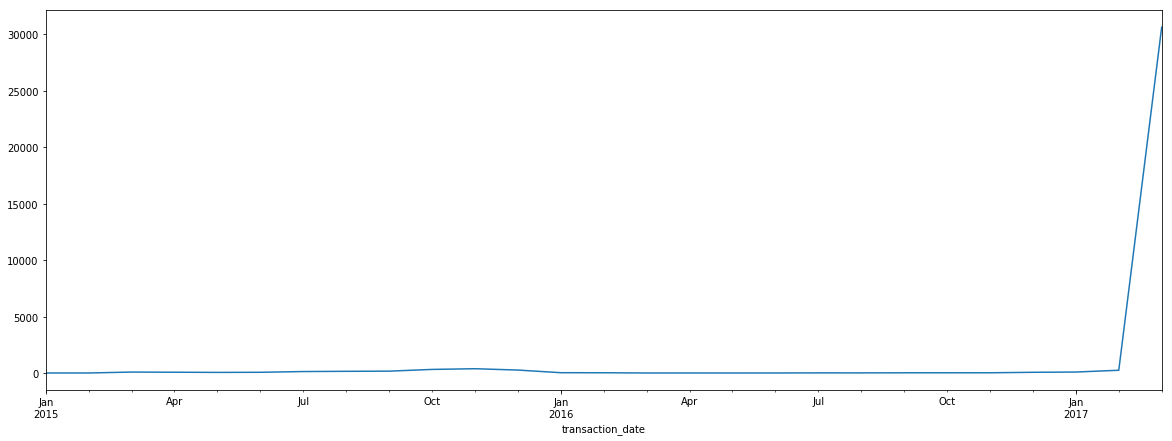

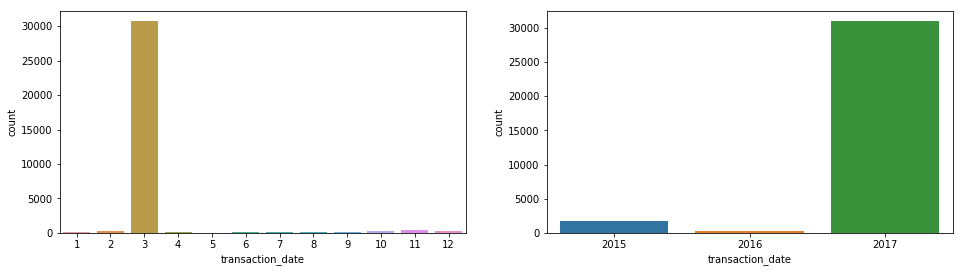

In [337]:
periods = pd.DatetimeIndex(cancel_date).to_period("M")
cancel_count_monthly = cancel_date.groupby(periods).count()
plt.figure(figsize=(20,7))
cancel_count_monthly.plot()
cancel_month = pd.DatetimeIndex(cancel_date).month
plt.figure(figsize=(16,9))
plt.subplot(221)
sns.countplot(cancel_month)
cancel_year = pd.DatetimeIndex(cancel_date).year
plt.subplot(222)
sns.countplot(cancel_year)
plt.show()

It puts me in confusion why most of the cancellations occurred in 2017 March!!!